# Sketch of zoning theory

In this document I'll sketch out a possible way to implement use-type and FAR zoning in the construction sector. I've mostly maintained the notation used in Andrii's note. One difference is that I allow a location-specific price of non-land construction inputs. In the absence of data, of course, this price could be normalized to 1.

#### Possible advantages of this approach relative to the sketched approach based on Acosta (2022):
1. It's continuous--there is no $\max$ function. Note that if we did have a $\max$ function, we'd be constrained to two options:
   1. assume the constraints are always binding--this would be a problem for a model of an entire state with many rural and undeveloped areas.
   2. just suck it up and deal with the computational cost and analytical complexity.
2. Does not require us to assume that the statutory limit is always perfectly binding--it almost never is!
3. Allows for variation in the stringency of enforcement across municipalities, and for that variation to be *identified.*

There are 3 parts:
1. Sketch of the basic specification.
2. Demonstration of the properties of the FAR zoning specification, with a graph.
3. Discussion of how the relevant parameter could be identified.

## A possible implementation

Let there be a certain number of locations indexed by $i$, each with a supply of buildable land equal to $\Lambda_i$. Let there be two land uses indexed by $f \in \{R,W\}$. Let floorspace for use $f$ in location $i$ be specified as follows:

$$\begin{align}\tag{1}\label{fpprod}
H_{fi} = B_{fi} L_{fi}^{\eta_i} K_{fi}^{1-\eta_i}
\end{align}$$

In \eqref{fpprod}, $L_{fi}$ is the quantity of land input used, $K_{fi}$ is the quantity of non-land input, $\eta_i$ is the share of land in production, and $B_{fi}$ is total factor productivity. Then, let $q_{fi}$ denote the per-unit sale price of floorspace, $l_{fi}$ denote the per-unit price of land, and $z_{fi}$ denote the per-unit price of non-land inputs. The problem of the representative developer is given by:

$$\begin{align}\tag{2}\label{devproblem}
\max\limits_{\{L_{fi},K_{fi}\}} q_{fi} B_{fi} L_{fi}^{\eta_i} K_{fi}^{1-\eta_i} - l_{fi} L_{fi} - z_{fi} K_{fi}
\end{align}$$

### Use type zoning

In each location $i$ let there be zoning regulations that requires no more than a fraction $\nu_{fi}$ of $\Lambda_i$ to be used for $f \in \{R,W\}$, with $\nu_{Ri} + \nu_{W_i} = 1$. There are no alternative uses for land, so in equilibrium $L_{fi} = \nu_{fi} \Lambda_i$.

Given this land allocation, the solution to \eqref{devproblem} implies that, in the absence of further explicit constraints, the optimal quantity of floorspace per land area, $\frac{H_{fi}}{\nu{fi} \Lambda_{fi}} = h_{fi}$ supplied for a given output price $q_{fi}$ and a given non-land input price $z_{fi}$ is given by

$$\begin{align}\tag{3}\label{hsupply}
h_{fi} = B_{fi}^{\frac{1}{\eta_{i}}} \left ( \frac{q_{fi}}{z_{fi}}  \right )^{\frac{1-\eta_i}{\eta_i}}
\end{align}
$$

### FAR zoning

Suppose that each location $i$ belongs to a municipality indexed by $m$. Let us also abuse notation and say that $m(i)$ represents the municipality that $i$ bleongs to. Conceptually, the role of municipalities in this model is to implement and enforce density-limiting zoning.

Suppose that construction TFP, $B_{fi}$, is actually the product of base TFP $b_{fi}$ and function of $g_{fi}(h_{fi})$ that represents restrictions in Floor-to-Area-Ratio: 

$$\begin{align}\label{farzone}\tag{4}
B_{fi} = b_{fi} g_{fi} \left ( h_{fi} \right ) 
\end{align}
$$

Then let $g_{fi}(h)$ be given as:
$$\begin{align}\label{gfunc}\tag{5}
g_{fi}(h) = \frac{1}{1 + e^{\beta_{m(i)} \left ( h_{fi} - \bar{h}_{fi}  \right ) }}
\end{align}
$$


In \eqref{gfunc}, $\bar{h}_{fi} > 0$ represents a statutory limit on the overall density of construction. Then,  $\beta_{m(i)}$ is a municipality-specific parameter which determines how abruptly enforcement is applied as built density approaches the statutory limit.

The effect of this specification is that as long as $h_{fi}$ is well below the $\bar{h}_{fi}$ limit, $B_{fi}$ will be almost exactly equal to $b_{fi}$. At some point, as $h_{fi}$ increases, $B_{fi}$ will begin to decline steadily. At some point, probably when $h_{fi}$ exceeds $\bar{h}_{fi}$ by some amount, $B_{fi}$ will decline to be effectively equal to zero, making further construction prohibitively expensive.

In the next cell, we will produce a graph illustrating how FAR zoning affects the equilibrium supply of floorspace.





### Demonstration of FAR Zoning

In the graph below, three floorspace density supply functions are plotted. All are subject to the same base TFP, $b_{fi}$.

The first function has no effective density limit: $\bar{h}_{fi} \to \infty$.

The second and third functions have the same density limit $\bar{h}_{fi}$, represented by the grey dotted line. The third function has a higher "abruptness" parameter $\beta_{m(i)}$ than the second.

The $x$-value at which each function crosses the red-dotted 45-degree line represents the optimal density of supply.



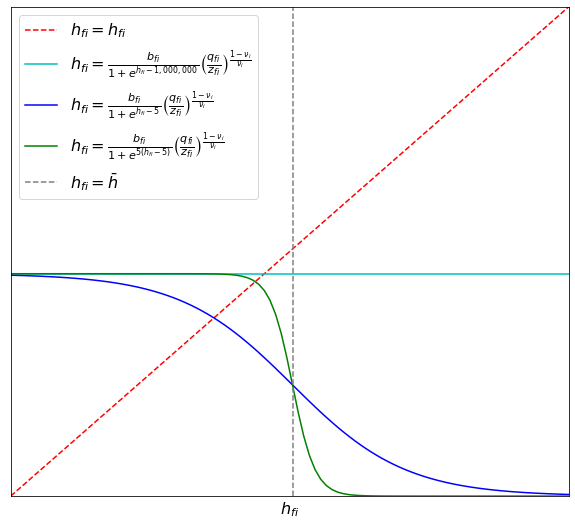

In [1]:
accompanying_text = r"""
### Demonstration of FAR Zoning

In the graph below, three floorspace density supply functions are plotted. All are subject to the same base TFP, $b_{fi}$.

The first function has no effective density limit: $\bar{h}_{fi} \to \infty$.

The second and third functions have the same density limit $\bar{h}_{fi}$, represented by the grey dotted line. The third function has a higher "abruptness" parameter $\beta_{m(i)}$ than the second.

The $x$-value at which each function crosses the red-dotted 45-degree line represents the optimal density of supply.

"""

import matplotlib.pyplot as plt
from IPython.display import Markdown,Latex

euler = 2.718281828459045

def exp(x):
    return euler**x

def gfunc(bet,hbar,h):
    return 1/(1+exp(bet*(h-hbar)))


eta = .3
bb = 4.5
qq = 1
zz = 1
hbar = 5



hh = [.1*x for x in range(100)]

beta_0 = 1
hbar_0 = 1000000

B_0 = [bb*gfunc(beta_0,hbar_0,h) for h in hh]
h_rhs_0 = [B*(qq/zz)**((1-eta)/eta) for B in B_0]

beta_1 = 1

B_1 = [bb*gfunc(beta_1,hbar,h) for h in hh]
h_rhs_1 = [B*(qq/zz)**((1-eta)/eta) for B in B_1]

beta_2 = 5

B_2 = [bb*gfunc(beta_2,hbar,h) for h in hh]
h_rhs_2 = [B*(qq/zz)**((1-eta)/eta) for B in B_2]


display((Markdown(accompanying_text)))
plt.figure(figsize=(10,9))
plt.plot(hh,hh,'r--',label='$h_{fi} = h_{fi}$')
plt.plot(hh,h_rhs_0,
         'c',
         label=r'$h_{fi} =  \frac{b_{fi}}{1+e^{{h_{fi}}-{1,000,000}}}\left ( \frac{q_{fi}}{z_{fi}}  \right )^{\frac{1-\nu_i}{\nu_i}}$')
plt.plot(hh,h_rhs_1,
         'b',
         label=r'$h_{fi} = \frac{b_{fi}}{1+e^{{h_{fi}}-{5}}}\left ( \frac{q_{fi}}{z_{fi}}  \right )^{\frac{1-\nu_i}{\nu_i}}$')
plt.plot(hh,h_rhs_2,
         'g',
         label=r'$h_{fi} = \frac{b_{fi}}{1+e^{5 ({h_{fi}}-{5})}}\left ( \frac{q_{fi}}{z_{fi}}  \right )^{\frac{1-\nu_i}{\nu_i}}$')

plt.xticks([])
plt.yticks([])
plt.xlim([min(hh),max(hh)])
plt.ylim([min(hh),max(hh)])
plt.axvline(x=hbar,color='grey',linestyle='--',label=r'$h_{fi} = \bar{h}$')
plt.legend(fontsize=16)
plt.xlabel(r'$h_{fi}$',fontsize=16)
plt.show()


## Identifying $\beta$

Suppose that preferences are Cobb Douglas so that aggregate residential floorspace demand can be written something like:

$$\begin{align}\label{resdemand}\tag{6}
H_{Ri} = \frac{\alpha Y_{i}}{q_{Ri}}
\end{align}
$$

In \eqref{resdemand}, $Y_{i}$ is aggregate income of residents (properly defined), and $\alpha$ is the housing share of consumption.

We can combine this with \eqref{hsupply} and rearrange to arrive at:
$$\begin{align}\label{theq}\tag{7}
\eta_i \log \left ( \frac{\alpha Y_i}{\nu_{Ri} \Lambda_i z_{i}} \right ) - \log \left ( \frac{p_{Ri}}{z_{i}} \right ) = \log b_{Ri}  -\log \left (1 + e^{\beta_{m(i)} \left ( h_{Ri} - \bar{h}_{Ri} \right )} \right )
\end{align}
$$

If we observe *both* $h_{Ri}$ and $\bar{h}_{Ri}$, it should be possible to identify $\beta_{m(i)}$ one way or another--for example, by minimizing the sum of squares of $b_{Ri}$ across each municipality.